In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="talk")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow import nn, optimizers
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

# Import Dataset

In [2]:
df = pd.read_csv("/content/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preprocessing

In [5]:
minmax = MinMaxScaler()

In [9]:
df_num = pd.DataFrame(minmax.fit_transform(df[["age", "trestbps", "chol", "thalach", "oldpeak"]]))

In [12]:
df_num.columns = ["age", "trestbps", "chol", "thalac", "oldpeak"]

In [14]:
df_col = df.loc[:, ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]]

In [16]:
df_new = pd.concat([df_num, df_col], axis="columns")

In [26]:
label = pd.get_dummies(df_new["target"])

In [27]:
df_new = pd.concat([df_new, label], axis="columns")
df_new.drop("target", axis="columns", inplace=True)

In [32]:
df_new = df_new.rename({0:"tidak_terkena", 1:"terkena"}, axis="columns")

# Datasets Splitting

In [35]:
X = df_new.loc[:, "age":"thal"]
y = df_new.loc[:, "tidak_terkena":"terkena"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242, 2), (61, 2))

# Arsitektur Model

In [37]:
model = Sequential([
                    Dense(64, activation="relu", input_shape=(13,)),
                    Dense(256, activation="relu"),
                    Dropout(0.2),
                    Dense(128, activation="relu"),
                    Dense(2, activation="softmax")
])

# Model Compile

In [38]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0003), loss="categorical_crossentropy", metrics=["accuracy"])

# Training

In [58]:
es = EarlyStopping(monitor="val_accuracy", mode="max", patience=30, restore_best_weights=True)

In [59]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=1, callbacks=[es], validation_data=(X_test, y_test))

Epoch 1/500
8/8 [==============================] - 0s 12ms/step - loss: 0.3275 - accuracy: 0.8430 - val_loss: 0.3552 - val_accuracy: 0.8689
Epoch 2/500
8/8 [==============================] - 0s 5ms/step - loss: 0.3073 - accuracy: 0.8760 - val_loss: 0.3530 - val_accuracy: 0.8689
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 0.2903 - accuracy: 0.8802 - val_loss: 0.3466 - val_accuracy: 0.8689
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 0.3030 - accuracy: 0.8884 - val_loss: 0.3500 - val_accuracy: 0.8689
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.8926 - val_loss: 0.3436 - val_accuracy: 0.8525
Epoch 6/500
8/8 [==============================] - 0s 4ms/step - loss: 0.2804 - accuracy: 0.8926 - val_loss: 0.3489 - val_accuracy: 0.8525
Epoch 7/500
8/8 [==============================] - 0s 5ms/step - loss: 0.2702 - accuracy: 0.8967 - val_loss: 0.3384 - val_accuracy: 0.8361
Epoch 8/500
8/8 [=========

In [60]:
model.evaluate(X_train, y_train, verbose=1)

8/8 [==============================] - 0s 1ms/step - loss: 0.2924 - accuracy: 0.8843


[0.2923675775527954, 0.8842975497245789]

In [61]:
model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 5ms/step - loss: 0.3552 - accuracy: 0.8689


[0.3551628589630127, 0.868852436542511]

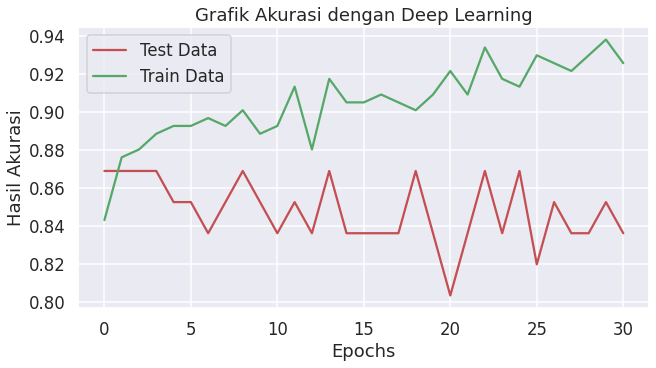

In [67]:
plt.figure(figsize=(9, 5), constrained_layout=True)
plt.title("Grafik Akurasi dengan Deep Learning")
plt.plot(hist.history["val_accuracy"], color="r", label="Test Data")
plt.plot(hist.history["accuracy"], color="g", label="Train Data")
plt.xlabel("Epochs")
plt.ylabel("Hasil Akurasi")
plt.legend()
plt.show()